In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [290]:
df=pd.read_csv("D:\\DATASETS\\used_cars_data.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [292]:
df.isnull().mean()*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [293]:
df=df.drop(['S.No.'],axis=1)

In [294]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [295]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')

In [296]:
df[['Mileage','Engine','Power']]=imputer.fit_transform(df[['Mileage','Engine','Power']])

In [297]:
imputerTwo=SimpleImputer(strategy='median')
df[['Seats','Price']]=imputerTwo.fit_transform(df[['Seats','Price']])

In [298]:
company_names=[]
for i in df['Name']:
    company_names.append(i.split(' ')[0])

In [299]:
company_names
df['Company_Name']=company_names

In [300]:
car_names=[]
for i in df['Name']:
    car_names.append(i.split(' ')[1:2])

In [301]:
for i in df['Name']:
    print((i.split(' ')[1:2]))

['Wagon']
['Creta']
['Jazz']
['Ertiga']
['A4']
['EON']
['Micra']
['Innova']
['Vento']
['Indica']
['Ciaz']
['City']
['Swift']
['Rover']
['Rover']
['Pajero']
['Amaze']
['Swift']
['Duster']
['New']
['3']
['S']
['A6']
['i20']
['Vento']
['City']
['Micra']
['Alto']
['WRV']
['Innova']
['Duster']
['Corolla']
['Ssangyong']
['A6']
['Vento']
['Wagon']
['Vitara']
['KUV']
['M-Class']
['Polo']
['Alto']
['Nano']
['KUV']
['i20']
['Elantra']
['Corolla']
['Elantra']
['Innova']
['Xcent']
['Thar']
['A4']
['Swift']
['Swift']
['Swift']
['Grand']
['Vento']
['KWID']
['i10']
['X-Trail']
['Zen']
['Innova']
['Figo']
['New']
['New']
['Indica']
['A4']
['City']
['C-Class']
['Ertiga']
['Creta']
['Cayenne']
['XUV500']
['i10']
['Terrano']
['Brio']
['A6']
['Fiesta']
['Innova']
['Innova']
['Santro']
['Swift']
['Zest']
['Amaze']
['Figo']
['Ritz']
['City']
['5']
['i10']
['Grand']
['Santro']
['Amaze']
['Fortuner']
['A6']
['Ecosport']
['XUV500']
['Amaze']
['Polo']
['Verna']
['Wagon']
['Polo']
['i20']
['i20']
['GO']
['A4']
[

In [302]:
car_names=[car[0] for car in car_names]

In [303]:
df['Car_Name']=car_names

In [304]:
df=df.drop('Name',axis=1)

In [305]:
columnn_names=['Car_Name','Company_Name','Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price','New_Price']

In [306]:
df=df[columnn_names]
df.head()

,Car_Name,Company_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price
0,Wagon,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,NaN
1,Creta,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,NaN
2,Jazz,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,8.61 Lakh
3,Ertiga,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,NaN
4,A4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,NaN


In [308]:
df.head()

,Car_Name,Company_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price
0,Wagon,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,NaN
1,Creta,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,NaN
2,Jazz,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,8.61 Lakh
3,Ertiga,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,NaN
4,A4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,NaN


In [309]:
def col_changes(col):
    listy=[]
    for i in df[col]:
        listy.append(i.split(' ')[0])
    df.drop(col,axis=1)
    df[col]=listy

In [310]:
col_changes('Mileage')

In [311]:
col_changes('Engine')
col_changes('Power')

In [312]:
df.head()

,Car_Name,Company_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price
0,Wagon,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,NaN
1,Creta,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,NaN
2,Jazz,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,8.61 Lakh
3,Ertiga,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,NaN
4,A4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,NaN


In [320]:
df['New_Price'].dtype

dtype('O')

In [331]:
df['New_Price'] = df['New_Price'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [334]:
imputer_three=SimpleImputer(strategy='median')
df[['New_Price']]=imputer_three.fit_transform(df[['New_Price']])
df.head()

,Car_Name,Company_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price
0,Wagon,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,11.27
1,Creta,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,11.27
2,Jazz,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,8.61
3,Ertiga,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,11.27
4,A4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,11.27


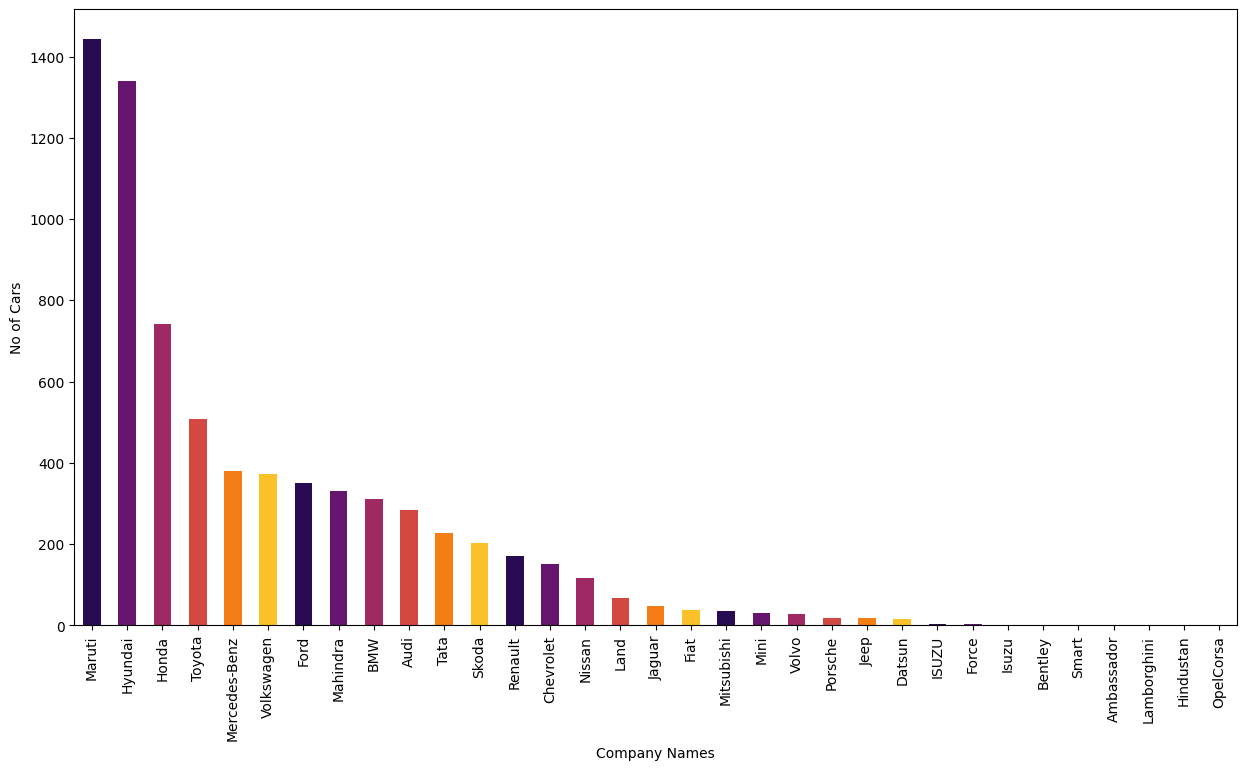

In [313]:
colors=sns.color_palette('inferno')
plt.figure(figsize=(15,8))
df['Company_Name'].value_counts().plot(kind='bar',color=colors)
plt.xlabel('Company Names')
plt.ylabel('No of Cars')
plt.show()

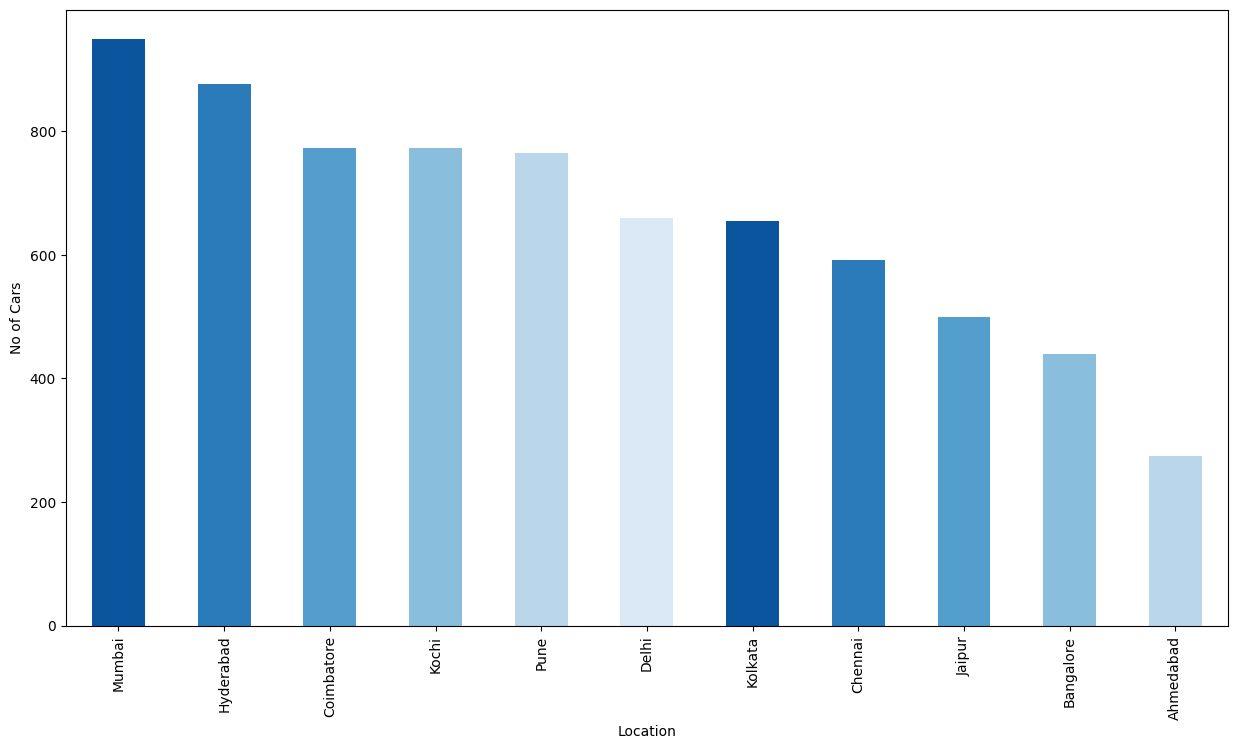

In [314]:
colors=sns.color_palette('Blues_r')
plt.figure(figsize=(15,8))
df['Location'].value_counts().plot(kind='bar',color=colors)
plt.xlabel('Location')
plt.ylabel('No of Cars')
plt.show()

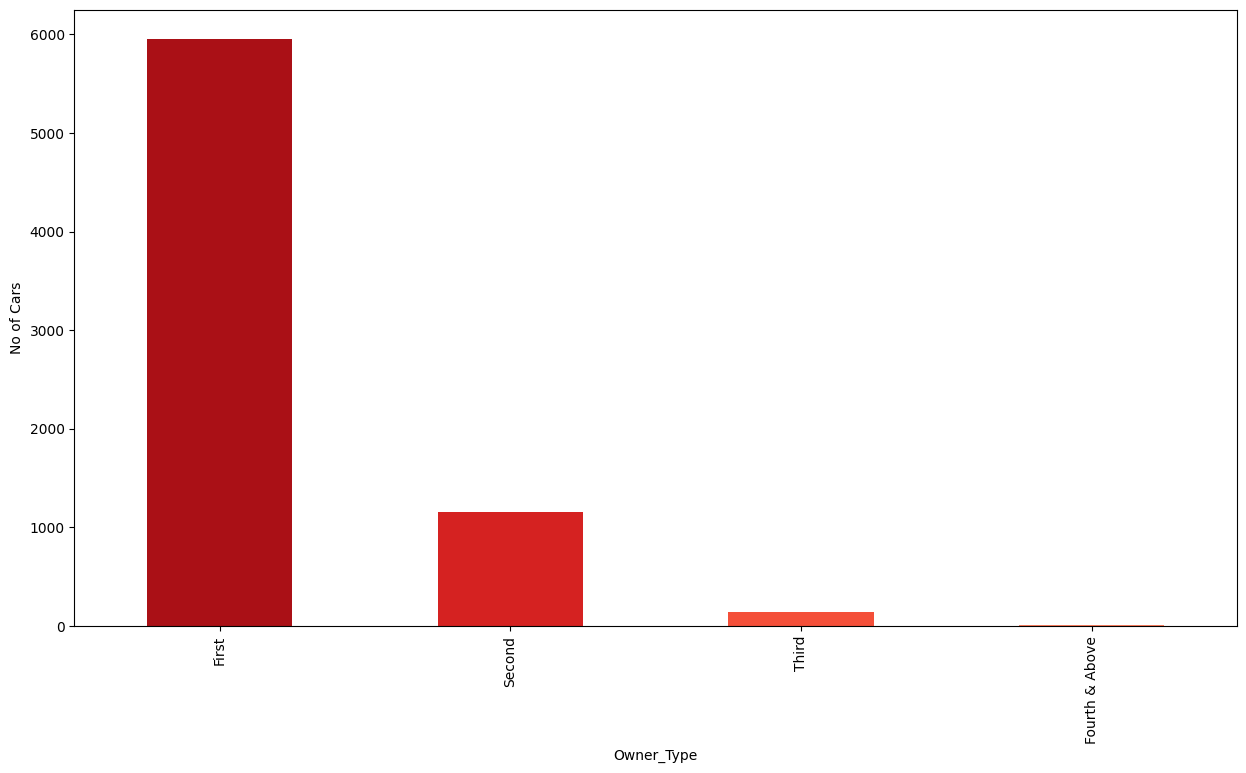

In [315]:
colors=sns.color_palette('Reds_r')
plt.figure(figsize=(15,8))
df['Owner_Type'].value_counts().plot(kind='bar',color=colors)
plt.xlabel('Owner_Type')
plt.ylabel('No of Cars')
plt.show()

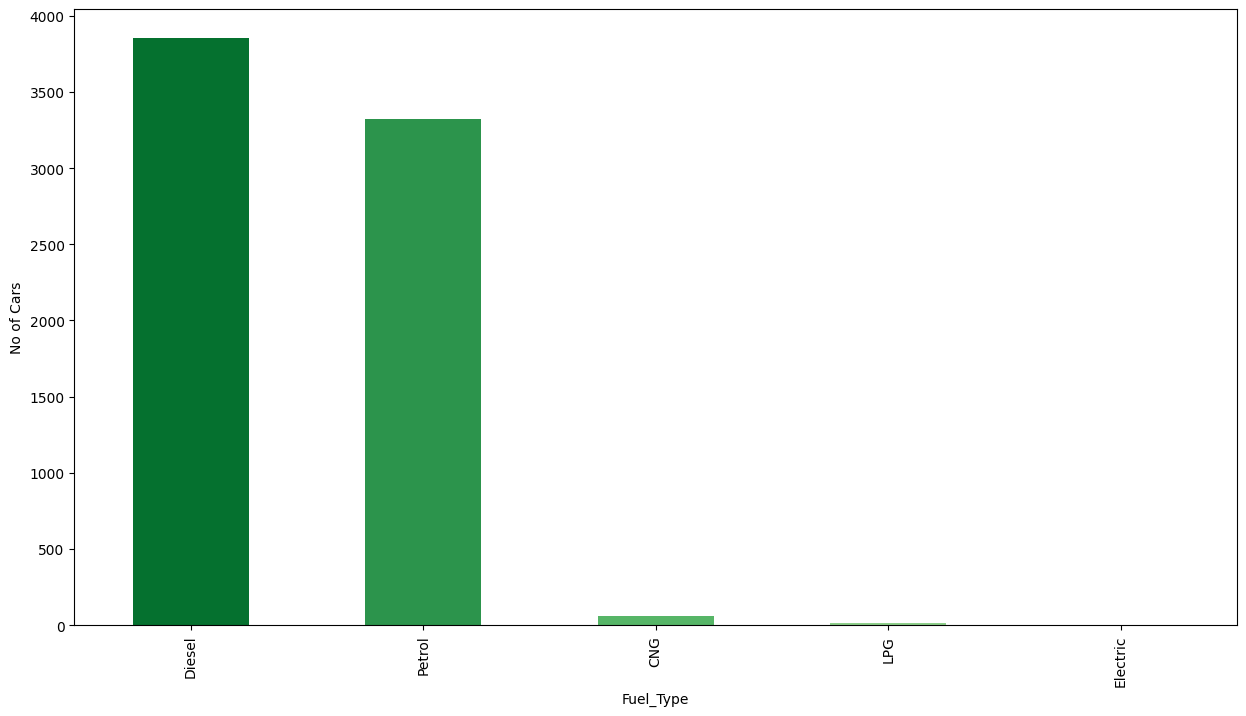

In [316]:
colors=sns.color_palette('Greens_r')
plt.figure(figsize=(15,8))
df['Fuel_Type'].value_counts().plot(kind='bar',color=colors)
plt.xlabel('Fuel_Type')
plt.ylabel('No of Cars')
plt.show()

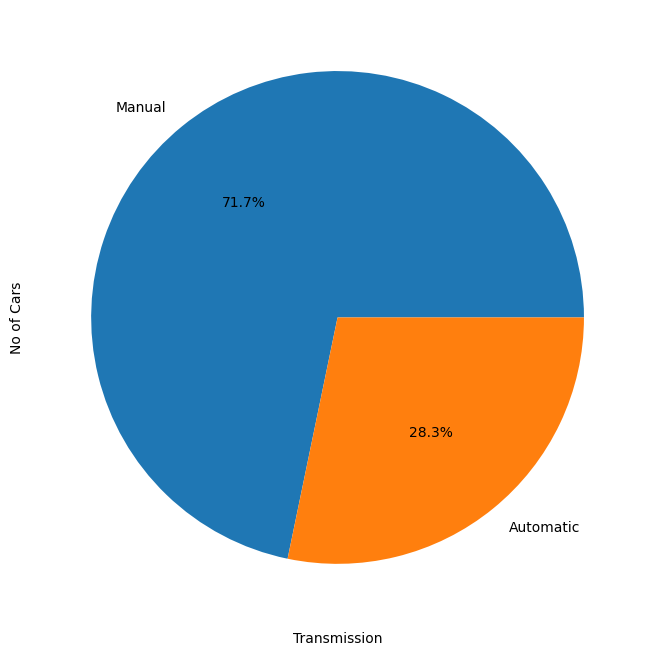

In [317]:
colors=sns.color_palette('plasma_r')
plt.figure(figsize=(15,8))
df['Transmission'].value_counts().plot(kind='pie',autopct='%1.1f%%',color=colors)
plt.xlabel('Transmission')
plt.ylabel('No of Cars')
plt.show()

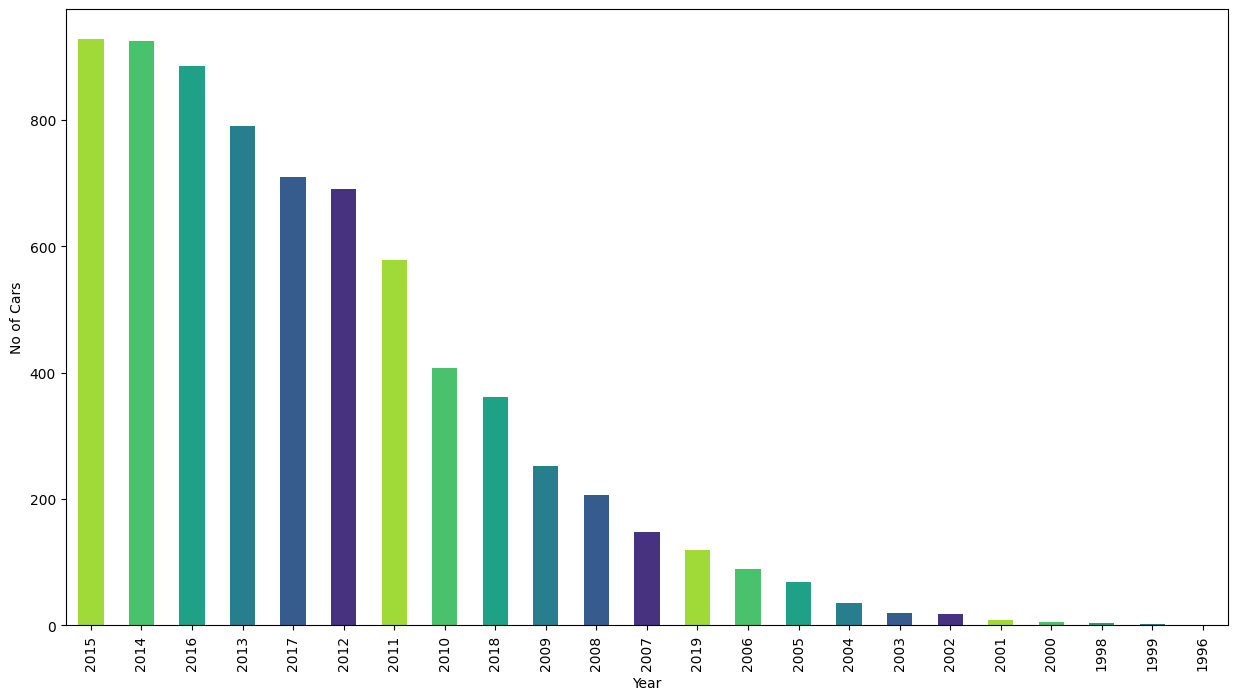

In [318]:
colors=sns.color_palette('viridis_r')
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar',color=colors)
plt.xlabel('Year')
plt.ylabel('No of Cars')
plt.show()